In [7]:

import numpy as np
import matplotlib.pyplot as plt
import urllib.request

function for plot image

In [8]:
def plot_image(image,name_image):
  image = np.clip(image,0,255)
  image = image.astype(np.uint8)
  plt.imshow(image,cmap='gray')
  plt.title(name_image)
  plt.show()

In [9]:

image_url = 'https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201902/MIMIC-CXR-Chest-X-Ray-00_0.jpeg?itok=5bs7IlJ7'
image_path = 'image.jpg'
urllib.request.urlretrieve(image_url, image_path)

('image.jpg', <http.client.HTTPMessage at 0x25d0e0b92e0>)

Lets view some parameters our image

In [10]:
image = plt.imread(image_path).astype(float)
new_image = image.copy()
def param_view(img):
    print('Image shape:', img.shape)
    print('Max val:', np.max(img))
    print('Min val:', np.min(img))
    print(img.mean(),"brightness")
    print(img.std(),"contrast")
param_view(image)
n_ima = image[:,:,0]
n_ima.shape



Image shape: (352, 498, 3)
Max val: 251.0
Min val: 5.0
124.30466563222588 brightness
56.283574832241015 contrast


(352, 498)

The algo for change :

In [11]:
def imp(a,b,image):

# Change contrast (std) to a 
    alpha = a / image.std() 
    avg = image.mean()
    new_image = alpha*(image - image.mean()) + avg 
    new_image = np.clip(a=new_image, a_min=0, a_max=255) 
#  𝑓(𝑖,𝑗)←𝛼∗[𝑓(𝑖,𝑗)−𝑏]+𝑏

    # Change brightness to b 
    new_image = new_image + b - avg 
    new_image = np.clip(a=new_image, a_min=0, a_max=255)
    cont =  new_image.std()
    bri = new_image.mean()
 
    return alpha, new_image,cont,bri
    

Results

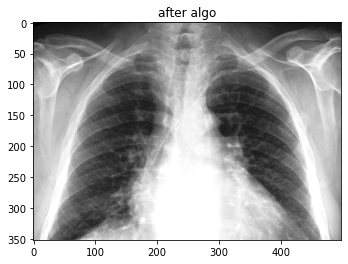

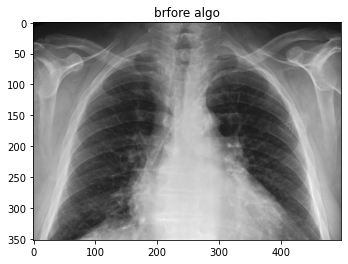

a : 60 b : 170
brightness of old image : 124.30466563222588 brightness after algo : 169.0229706736458
contrast of old image : 56.283574832241015 contrast after algo : 58.4403637401767
the change of contrast is: 1.0660280151335282
the change of brightness is 135.97475992874297 precent


In [6]:
a= 60
b=170
alpha,new_im,contrast,brigh = imp(a,b,n_ima)
new_im= new_im.astype(np.uint8)
plt.imshow(new_im,cmap='gray')
plt.title("after algo")
plt.show(),plot_image(image,"brfore algo")
change_b =brigh*100/(image.mean())
print("a :",a,"b :",b)
print("brightness of old image :",image.mean(),"brightness after algo :",brigh)
print("contrast of old image :",image.std(),"contrast after algo :",contrast)
print("the change of contrast is:",alpha)
print("the change of brightness is",change_b, "precent")



